In [24]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [25]:
# Define the paths to the train and test CSV files
train_file_path = 'part_1_data/train_encoded_lemmatize.csv'
test_file_path = 'part_1_data/test_encoded_lemmatize.csv'

# Load the train and test datasets
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Convert all entries in the DataFrames to strings
train_df = train_df.astype(str)
test_df = test_df.astype(str)

In [26]:
# Encode the labels
label_encoder = LabelEncoder()
train_df['genre'] = label_encoder.fit_transform(train_df['genre'])

# Preprocess text data (lyrics) using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
X_lyrics = vectorizer.fit_transform(train_df['lyrics'])

results_df = pd.DataFrame()

# Labels (genre)
y = train_df['genre']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(train_df['lyrics'], y, test_size=0.2, random_state=42)


In [28]:
# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1000)),  # Preprocess text data (lyrics)
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42))  # Train the Gradient Boosting model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the trained pipeline model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(pipeline, model_filename)
print(f"Trained pipeline model saved to {model_filename}")


Trained pipeline model saved to random_forest_model.pkl


In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1000)),  # Preprocess text data (lyrics)
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))  # Train the Gradient Boosting model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the trained pipeline model to a file
model_filename = 'gradient_boost_model.pkl'
joblib.dump(pipeline, model_filename)
print(f"Trained pipeline model saved to {model_filename}")


Trained pipeline model saved to gradient_boost_model.pkl
Classification report saved to 'classification_report.txt'.


ValueError: DataFrame constructor not properly called!

Results saved to 'results.csv'.
Classification report saved to 'classification_report.txt'.


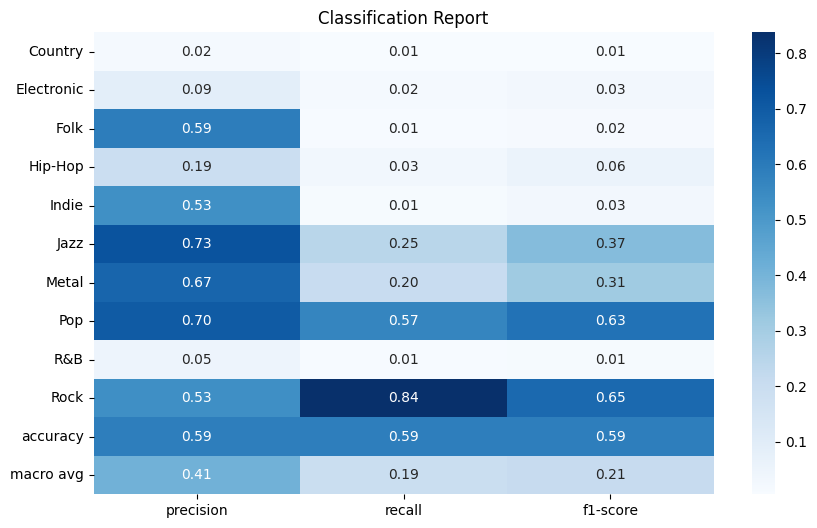

In [23]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

# Ensure results_df is defined
results_df = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Add the results to results_df
idx = len(results_df)
results_df.loc[idx] = ['gradient_boost', test_accuracy, test_precision, test_recall, test_f1]

# Save the results_df to a file
results_df.to_csv('results.csv', index=False)
print("Results saved to 'results.csv'.")

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Save the classification report to a text file
with open('classification_report.txt', 'w') as file:
    file.write(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Classification report saved to 'classification_report.txt'.")

# Convert the classification report to a DataFrame
classification_report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(classification_report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.show()